<a href="https://colab.research.google.com/github/sarahxu087/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Sarah_Xu_LS_DS10_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



In [0]:

column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
               header=None,
               names=column_headers,
               na_values="?")
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df=df.replace({'y':1,"n":0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


**Confidence Intervals answer:**

In [0]:
def confidence_interval(data, confidence=0.95):
  data=data.dropna()
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean - moe, mean, mean + moe)

confidence_interval(df['budget'])

(0.5498151808536169, 0.5966981132075472, 0.6435810455614774)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


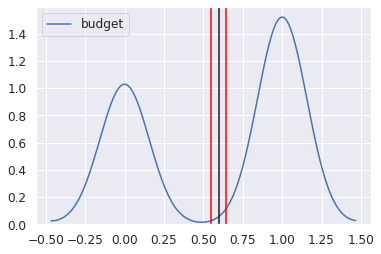

In [0]:
import seaborn as sns

sns.kdeplot(df['budget'])
CI = confidence_interval(df['budget'])
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='k');

**`Chi-squared tests answer1:`**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [0]:
df.describe(exclude='number')

,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
count,2667,2693,2662,2693,2693
unique,398,2639,17,1669,4
top,actor,12/18/13,Acting,Fareed Zakaria,"Acting, Comedy & Music"
freq,596,3,930,19,1203


In [0]:
contingency_table=pd.crosstab(df['Occupation'],df['Year'],margins=True)
contingency_table

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,All
Occupation,,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",150,125,114,99,93,63,60,58,36,34,34,58,55,44,71,64,45,1203
Government and Politics,2,14,6,11,17,37,26,31,24,33,34,30,27,33,21,21,17,384
Media,11,21,31,42,41,45,54,47,47,77,59,50,51,52,51,53,24,756
Other,3,9,6,7,15,19,22,25,34,20,36,27,30,35,23,25,14,350
All,166,169,157,159,166,164,162,161,141,164,163,165,163,164,166,163,100,2693


In [0]:
actingCount=contingency_table.iloc[0][0:17].values
actingCount


array([150, 125, 114,  99,  93,  63,  60,  58,  36,  34,  34,  58,  55,
        44,  71,  64,  45])

In [0]:
govCount=contingency_table.iloc[1][0:17].values
govCount

array([ 2, 14,  6, 11, 17, 37, 26, 31, 24, 33, 34, 30, 27, 33, 21, 21, 17])

In [0]:
mediaCount=contingency_table.iloc[2][0:17].values
mediaCount

array([11, 21, 31, 42, 41, 45, 54, 47, 47, 77, 59, 50, 51, 52, 51, 53, 24])

In [0]:
otherCount=contingency_table.iloc[3][0:17].values
otherCount

array([ 3,  9,  6,  7, 15, 19, 22, 25, 34, 20, 36, 27, 30, 35, 23, 25, 14])

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

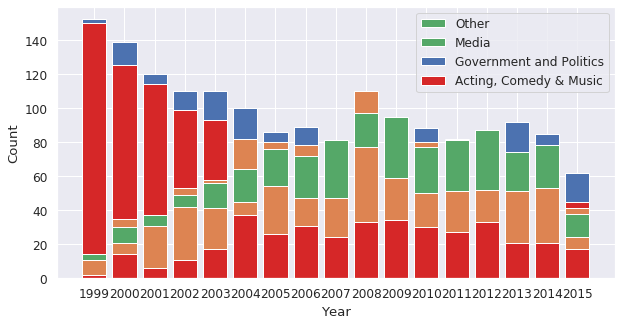

In [0]:
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.1)
categories = ["1999","2000","2001","2002","2003","2004",'2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
p1 = plt.bar(categories, actingCount, 0.8, color='#d62728')
p2 = plt.bar(categories, govCount, 0.8, bottom=actingCount)
p3 = plt.bar(categories, mediaCount, 0.8, bottom=govCount)
p3 = plt.bar(categories, otherCount, 0.8, bottom=mediaCount)


plt.legend((p4[0], p3[0],p2[0], p1[0]), ('Other', 'Media','Government and Politics','Acting, Comedy & Music'))
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [0]:
observed=pd.crosstab(df['Year'],df['Occupation'])
observed

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,150,2,11,3
2000,125,14,21,9
2001,114,6,31,6
2002,99,11,42,7
2003,93,17,41,15
2004,63,37,45,19
2005,60,26,54,22
2006,58,31,47,25
2007,36,24,47,34


**`Chi-squared tests answer2:`**

In [0]:
from scipy import stats
chi_squared,p_value,dof,expected=stats.chi2_contingency(observed)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 468.28696365013917
P-value: 2.773663754414657e-70
Degrees of Freedom: 48
Expected: 
 [[74.15447456 23.67025622 46.60081693 21.57445228]
 [75.49461567 24.09803193 47.44300037 21.96435202]
 [70.13405124 22.38692908 44.07426662 20.40475306]
 [71.02747865 22.67211289 44.63572224 20.66468622]
 [74.15447456 23.67025622 46.60081693 21.57445228]
 [73.26104716 23.38507241 46.03936131 21.31451912]
 [72.36761975 23.0998886  45.47790568 21.05458596]
 [71.92090605 22.9572967  45.19717787 20.92461938]
 [62.98663201 20.1054586  39.58262161 18.32528778]
 [73.26104716 23.38507241 46.03936131 21.31451912]
 [72.81433346 23.24248051 45.75863349 21.18455254]
 [73.70776086 23.52766431 46.32008912 21.4444857 ]
 [72.81433346 23.24248051 45.75863349 21.18455254]
 [73.26104716 23.38507241 46.03936131 21.31451912]
 [74.15447456 23.67025622 46.60081693 21.57445228]
 [72.81433346 23.24248051 45.75863349 21.18455254]
 [44.67137022 14.25919049 28.07278128 12.996658  ]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
print(dem['south-africa'].mean())
print(rep['south-africa'].mean())


stats.ttest_ind(dem['south-africa'], rep['south-africa'], nan_policy='omit')

0.9351351351351351
0.6575342465753424


Ttest_indResult(statistic=6.849454815841208, pvalue=3.652674361672226e-11)

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)